In [1]:
!pip3 install -qq google-play-scraper

In [2]:
!pip3 install -qq -U watermark

In [3]:
# Commented out IPython magic to ensure Python compatibility.
#%reload_ext watermark
#%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
#%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

### List of Food Delivery Apps

Singapore as a sample country.

Apps
- foodpanda
- deliveroo
- Grab
- Gojek

In [4]:
app_packages = [
  'com.global.foodpanda.android',
  'com.grabtaxi.passenger',
  'com.deliveroo.orderapp',
  'com.gojek.app',   
]

app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en')
    del info['comments']
    app_infos.append(info)

100%|██████████| 4/4 [00:01<00:00,  3.21it/s]


In [6]:
def print_json(json_object):
    json_str = json.dumps(
        json_object, 
        indent=2, 
        sort_keys=True, 
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [7]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 and up",
  "appId": "com.global.foodpanda.android",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "foodpanda \u2013 food and more, delivered\r\n \r\nCraving something delicious from your favourite restaurant? Forgot to pick up the shopping on your way home? We deliver food and groceries in a flash \u2013 whatever you\u2019re after. It\u2019s our mission to bring everything you want, need or crave right to your door, whether it\u2019s a meal from your favourite local restaurant or same day grocery delivery and cleaning supplies.\r\n \r\ndownload the app to check if we're in your city\r\n \r\nOur app is crammed with the greatest food experiences in the world. Hungry for wood-fired pizza, a classic burger or super fresh sushi? We know the best food for every cuisine that your city has to offer. foodpanda is the best food delive

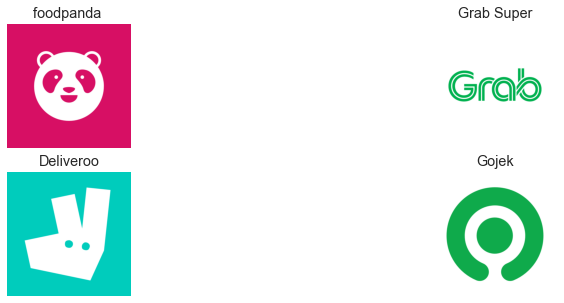

In [11]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))
for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [12]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

app_infos_df.head()

title  \
0                  foodpanda - Grocery Delivery   
1                                 Grab Superapp   
2  Deliveroo: Food, Takeaway & Grocery Delivery   
3                                         Gojek   

                                         description  \
0  foodpanda – food and more, delivered\r\n \r\nC...   
1  Grab is Southeast Asia’s leading superapp. We ...   
2  <b>Food. We Get It. </b> Order takeaway and ea...   
3  Gojek is beyond an app for online transportati...   

                                     descriptionHTML  \
0  foodpanda – food and more, delivered<br> <br>C...   
1  Grab is Southeast Asia’s leading superapp. We ...   
2  <b>Food. We Get It. </b> Order takeaway and ea...   
3  Gojek is beyond an app for online transportati...   

                                             summary  \
0                          food and more, delivered.   
1    Your Everyday Everything App in Southeast Asia.   
2  Takeaway & grocery delivery from Wagamama, KFC...   
3  Transportation, Bill Payment, Food Delivery, L...   

                                         summaryHTML      installs  \
0                          food and more, delivered.   50,000,000+   
1    Your Everyday Everything App in Southeast Asia.  100,000,000+   
2  Takeaway &amp; grocery delivery from Wagamama,...   10,000,000+   
3  Transportation, Bill Payment, Food Delivery, L...  100,000,000+   

   minInstalls     score  ratings  reviews  ...      released     updated  \
0     50000000  4.113853  2436334     6994  ...  Nov 19, 2013  1637083629   
1    100000000  4.689727  7661726     7675  ...  May 30, 2013  1637773707   
2     10000000  4.482633   638750     1124  ...  May 27, 2016  1638197891   
3    100000000  4.200000  4305065     2901  ...   Feb 2, 2015  1638014848   

     version                                      recentChanges  \
0    21.22.0  We're always working hard to optimize our app ...   
1  5.177.300  We can talk about bugs all day long, these lit...   
2     3.81.0  Bug fixes and performance enhancements might s...   
3     4.32.1  WE LOVE SOMETHING EXTRA\r\n\r\nLike the extra ...   

                                   recentChangesHTML editorsChoice  \
0  We&#39;re always working hard to optimize our ...         False   
1  We can talk about bugs all day long, these lit...         False   
2  Bug fixes and performance enhancements might s...         False   
3  WE LOVE SOMETHING EXTRA<br><br>Like the extra ...         False   

                                         similarApps  \
0  [com.grabtaxi.passenger, com.happyfresh.androi...   
1  [com.grabtaxi.driver2, com.lazada.android, com...   
2  [com.ubercab.eats, com.lafourchette.lafourchet...   
3  [com.grabtaxi.passenger, com.grabtaxi.driver2,...   

                                  moreByDeveloper  \
0                                            None   
1  [com.grabtaxi.driver2, com.telenav.streetview]   
2                                            None   
3                                            None   

                          appId  \
0  com.global.foodpanda.android   
1        com.grabtaxi.passenger   
2        com.deliveroo.orderapp   
3                 com.gojek.app   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  

[4 rows x 51 columns]

This code does not take into account of dataset balance, which might be something we would want to do later on.

In [20]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        rvs, _ = reviews(ap, lang='en', country='sg', sort=Sort.NEWEST, count=10000, filter_score_with=score)
        for r in rvs:
            r['sortOrder'] = 'newest'
            r['appId'] = ap
        app_reviews.extend(rvs)

100%|██████████| 4/4 [11:14<00:00, 168.68s/it]


In [21]:
"""Note that we're adding the app id and sort order to each review. Here's an example for one:"""

print_json(app_reviews[0])

{
  "appId": "com.global.foodpanda.android",
  "at": "2021-11-30 09:28:09",
  "content": "all app cannot update",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": null,
  "reviewId": "gp:AOqpTOEcnQKPlQvep9wukzCJ2PyEd72Qk2fxDzZQ28-tHTxX4gJYKWgPCU32hDI0r28O_UTaUbKU1w7P_6VB50c",
  "score": 1,
  "sortOrder": "newest",
  "thumbsUpCount": 0,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJzQp4BCbmT5qrvwSTSqj0vW7Wx8pcCiBqMjzwOE=mo",
  "userName": "Mek Bunga Orchid"
}



In [22]:
len(app_reviews)

181817

In [23]:
"""Let's save the reviews to a CSV file:"""

app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

app_reviews_df.head()

reviewId           userName  \
0  gp:AOqpTOEcnQKPlQvep9wukzCJ2PyEd72Qk2fxDzZQ28-...   Mek Bunga Orchid   
1  gp:AOqpTOHo9cHQn8pASMlvU4GsJCjOsXCapJ6nknwcX_y...        Geogrey Epa   
2  gp:AOqpTOG2KFZaXqoM8wm4zo4FDBKuL1UQHM12Dm6apcx...  Lloyd Paolo Ib-Ib   
3  gp:AOqpTOED5F_kZER-ILMS84xzgyUBitz7z0NRisIjoMc...     Lina Amiruldin   
4  gp:AOqpTOHJWWyXxBKVVYWG-oB1U0GYdjkZmY9Wm2t6DTm...           Bash Ang   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a/AATXAJ...   
3  https://play-lh.googleusercontent.com/a-/AOh14...   
4  https://play-lh.googleusercontent.com/a-/AOh14...   

                                             content  score  thumbsUpCount  \
0                              all app cannot update      1              0   
1  Stupid delivery service .. punya lh lama hanta...      1              0   
2                                           DELAYS 👎      1              0   
3                  Mmg setiap kli bkk kena update ke      1              0   
4                            Service not good at all      1              0   

  reviewCreatedVersion                  at replyContent repliedAt sortOrder  \
0                 None 2021-11-30 09:28:09         None       NaT    newest   
1              21.22.0 2021-11-30 09:23:51         None       NaT    newest   
2                 None 2021-11-30 08:39:47         None       NaT    newest   
3              21.21.0 2021-11-30 07:08:03         None       NaT    newest   
4                 None 2021-11-30 07:00:24         None       NaT    newest   

                          appId  
0  com.global.foodpanda.android  
1  com.global.foodpanda.android  
2  com.global.foodpanda.android  
3  com.global.foodpanda.android  
4  com.global.foodpanda.android

In [24]:
app_reviews_df.appId.value_counts()

com.gojek.app                   50000
com.grabtaxi.passenger          50000
com.global.foodpanda.android    50000
com.deliveroo.orderapp          31817
Name: appId, dtype: int64

In [27]:
app_reviews_df.groupby(['appId', 'score'])['score'].count()

appId                         score
com.deliveroo.orderapp        1        10000
                              2         2705
                              3         3080
                              4         6032
                              5        10000
com.global.foodpanda.android  1        10000
                              2        10000
                              3        10000
                              4        10000
                              5        10000
com.gojek.app                 1        10000
                              2        10000
                              3        10000
                              4        10000
                              5        10000
com.grabtaxi.passenger        1        10000
                              2        10000
                              3        10000
                              4        10000
                              5        10000
Name: score, dtype: int64